In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


d = pd.read_csv("train_input.csv")
df=d.drop(['pos7','pos14','pos22'],axis=1)
X = df.to_numpy()

df = pd.read_csv("train_output.csv")

y = df.to_numpy()
print("taille des données:")
print("X:", X.shape)
print("Y:", y.shape)

d = pd.read_csv("test_input.csv")
df=d.drop(['pos7','pos14','pos22'],axis=1)
Xtest = df.to_numpy()
print("test:", Xtest.shape)



taille des données:
X: (1837079, 22)
Y: (1837079, 2)
test: (1837080, 22)


In [2]:
X_part =X[0:5000, 1:25]
print(X_part.shape)
y_part =y[0:5000,1:2]
Xtest_part=Xtest[0:5000, 1:25]
print("X_part.shape:",X_part.shape)
print("y_part.shape:",y_part.shape)
print("Xtest_part.shape:",Xtest_part.shape)
print(X_part[1,:])
print(Xtest_part[1,:])

(5000, 21)
X_part.shape: (5000, 21)
y_part.shape: (5000, 1)
Xtest_part.shape: (5000, 21)
[6 5 2 1 2 2 6 4 4 1 4 6 6 1 3 1 5 3 5 3 2]
[3 1 1 5 1 2 6 2 4 2 4 2 5 6 6 3 3 1 5 6 4]


In [3]:
##OneHotEncoder pour les 24 faces,traite les donées d'entrainement  X
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore',sparse=True)
enc.fit(X_part)
X_part_OHE = enc.transform(X_part).toarray()
print(X_part_OHE.shape)
print(X_part_OHE[1,:])



(5000, 121)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0.]


In [4]:
##OneHotEncoder pour les 24 faces,traite les donées de test  Xtest
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Xtest_part)
Xtest_part_OHE = enc.transform(Xtest_part).toarray()
print(Xtest_part_OHE.shape)
print(Xtest_part_OHE[1,:])



(5000, 121)
[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0.]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_part, y_part, test_size=0.1,random_state=42)

In [6]:
##KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range=range(1,9)
scores ={}
scores_list =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtest_part_OHE, y_part.ravel())
    y_pred = knn.predict(Xtest_part_OHE)
    scores[k]=metrics.accuracy_score(y_part,y_pred)
    scores_list.append(metrics.accuracy_score(y_part,y_pred))

Text(0, 0.5, 'Testing Accuracy')

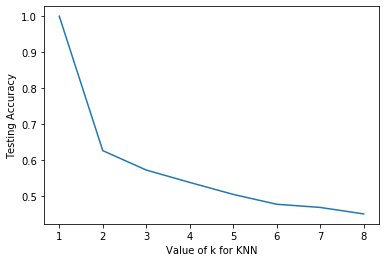

In [7]:
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel("Value of k for KNN")
plt.ylabel("Testing Accuracy")

In [85]:
##Arbre de Décision
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_score
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(Xtest_part_OHE, y_part)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree,Xtest_part, y_test)